# SPY and Moving Average Analysis
### We will be looking at the properties of the sma on the SPY
We will be answering some questions:
1.   Is the spy random noise?
2.   Can we get an edge when trading the SPY?
3.   what happens when the spy is below or above a said sma?
4.   can we use this info for some kind of strategy?

In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import talib
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import math
import statsmodels.tsa.stattools as ts

# Is the spy random?

In [2]:
df = pd.read_csv('SPY.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.968700,43.968700,43.750000,43.937500,26.954851,1003200
1,1993-02-01,43.968700,44.250000,43.968700,44.250000,27.146563,480500
2,1993-02-02,44.218700,44.375000,44.125000,44.343700,27.204052,201300
3,1993-02-03,44.406200,44.843700,44.375000,44.812500,27.491642,529400
4,1993-02-04,44.968700,45.093700,44.468700,45.000000,27.606684,531500
5,1993-02-05,44.968700,45.062500,44.718700,44.968700,27.587467,492100
6,1993-02-08,44.968700,45.125000,44.906200,44.968700,27.587467,596100
7,1993-02-09,44.812500,44.812500,44.562500,44.656200,27.395754,122100
8,1993-02-10,44.656200,44.750000,44.531200,44.718700,27.434109,379600
9,1993-02-11,44.781200,45.125000,44.781200,44.937500,27.568338,19500


First we will describe the Adj Close and the diff of the Adj Close

In [4]:
df_diff = pd.DataFrame(df['Adj Close'])
df_diff = df_diff.diff()
series_diff = Series(df_diff['Adj Close'])
print(series_diff.describe())

count    6560.000000
mean        0.038246
std         1.229485
min       -11.305298
25%        -0.416351
50%         0.051674
75%         0.551777
max        11.839997
Name: Adj Close, dtype: float64


looking at the summary we can see that the mean is ~0.04and the std is ~1.23 which implies that the series is not white noise. going based on the assumption that white noise has a mean of 0.0 and a std of 1.0. we can now use a hurst to see if it has a bell shape.

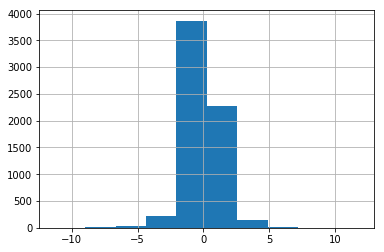

In [5]:
series_diff.hist()

as we can see the hist looks pretty normally distubuted and has no bias to either side. this may imply that the spy is random.

# Can we get an edge when trading the SPY?
We will be using various statistacle means in order to see if the spy is random walk over the short term and if not we can see if it trends or is mean reverting. the first thing we will be testing is the hurst exponent.

In [6]:
def PrecentChange(new, old):
    return ((new - old) / old)

def hurst_ernie_chan(p):
    lags = range(2,100)
    variancetau = []; tau = []

    for lag in lags: 
        tau.append(lag)
        pp = np.subtract(p[lag:], p[:-lag])
        variancetau.append(np.var(pp))
        
    m = np.polyfit(np.log10(tau),np.log10(variancetau),1)

    hurst = m[0] / 2

    return hurst

df_diff['log return'] = np.log(df["Adj Close"])
hurst_ernie_chan(df_diff['log return'])

0.4703470115723785

knowing that the hurst of the log returns is 0.47 means that the time series is not random walk but is very close.since the hurst is < 0.5 we know that the series is slightly mean reverting. knowing this we can test a strategy that uses mean reversion to see if its random walk or not.

# what happens when the spy is below or above a said sma?
next thing we need to do is run an analysis on the affects of the sma on the spy because we dont want to catch a falling knife when trading a mean reverting strategy. so we must know when the market is doing well and the sma can give us a nice and easy indication.

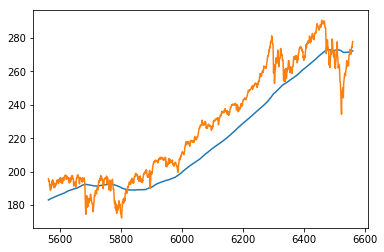

In [7]:
df['sma'] = talib.SMA(df['Adj Close'], 200)
plt.plot(df['sma'].tail(1000))
plt.plot(df['Adj Close'].tail(1000))
plt.show()

as we can tell just by looking at the graph by trading only when the spy is above the 200 day sma we are able to miss many of the major down turns which is beneficial.

In [8]:
below = []
above = []

i = 200
for i in range(len(df['sma'])):
    if df['Adj Close'][i] < df['sma'][i]:
        below.append(df['Adj Close'][i])
    elif df['Adj Close'][i] > df['sma'][i]:
        above.append(df['Adj Close'][i])

close_below = pd.DataFrame(below, columns=['below'])
close_above = pd.DataFrame(above, columns=['above'])
close_below['below_diff'] = close_below.diff()
close_above['above_diff'] = close_above.diff()

print("close below 200 day sma")
print(Series(close_below['below_diff']).describe())
print("\nclose above 200 day sma")
print(Series(close_above['above_diff']).describe())



close below 200 day sma
count    1538.000000
mean        0.157411
std         3.261714
min        -8.241851
25%        -0.813313
50%         0.028572
75%         0.767617
max        80.531982
Name: below_diff, dtype: float64

close above 200 day sma
count    4822.000000
mean        0.051614
std         1.207935
min       -37.546837
25%        -0.346491
50%         0.062481
75%         0.522684
max         6.956177
Name: above_diff, dtype: float64


from running this simple test we can see that the std is very high when the price is below the 200 sma and lower when above the sma. we can also see that the min difference is much smaller when trading below the sma and the mean is much higher which could be usefull. this information tells me that by trading above the sma we will have far less volatile swings when trading. if we where to create a strategy that does well in volatile markets or follows a trend we might consider trading below the sma. we can also test the hurst exponent on both sets to see what stratagie would work best.

In [12]:
close_below['log_ret'] = np.log(close_below.below)
close_above['log_ret'] = np.log(close_above.above)

print("above 200 day sma hurst: " + str(hurst_ernie_chan(close_above['log_ret'])))
print("below 200 day sma hurst: " + str(hurst_ernie_chan(close_below['log_ret'])))

above 200 day sma hurst: 0.4880342562072408
below 200 day sma hurst: 0.5679577707664354


looking at these stats we can say that when the price is below the sma it trends in the current direction. when the price is above the 200 day sma we can say that the series is mean reverting. with this information we could consider creating a strategy that trades based on mean reversion or momentum based on the current sma. we can also consider trading a 3x or 2x leveraged etf when the spy is above the 200 day sma because we know that it is less volatile and trade the spy when the price is below the sma in a momentum style. the best way to figure this out would be to test it.

In [52]:
from math import floor

def PrecentChange(new, old):
    return ((new - old) / old)

def max_drawdown(li):
    mdd = 0
    for i in range(len(li)):
        dd = 0
        for j in range(i + 1, len(li)):
            dd = PrecentChange(li[i], li[j])
            if dd >= 0:
                break
            if dd < mdd:
                mdd = dd
    return mdd

def sharpe_ratio(equity_li):
    df = pd.DataFrame(equity_li, columns=['capital'])
    df['daily'] = df['capital'].diff()
    return (df['daily'].mean() / df['daily'].std())

return: 186.69%
spy max draw down: -80.75%
spy sharpe ratio:0.0368
anual return: 14.36%


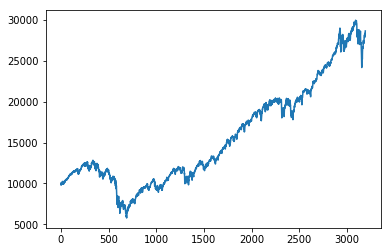

In [71]:
capital_bench = 10000
equity_bench = []
shares_bench = floor(capital_bench / df['Adj Close'][start_date])
capital_bench -= shares_bench * df['Adj Close'][start_date]

i = 0
for i in range(0, len(dfsso['Adj Close'])):
    equity_bench.append(capital_bench + (shares_bench * df['Adj Close'][start_date + i]))

capital_bench = capital_bench + (shares_bench * df['Adj Close'][start_date + i])
print "return: " + str(round(PrecentChange(capital_bench, 10000) * 100,2)) + "%"
print "spy max draw down: " + str(round(max_drawdown(equity_bench) * 100,2)) + "%"
print "spy sharpe ratio:" + str(round(sharpe_ratio(equity_bench),4))
print "anual return: " + str(round(PrecentChange(capital_bench, 10000) / 13 * 100,2)) + '%'

plt.plot(equity_bench)
plt.show()

return: -59.15%
algo max draw down: -29.19%
algo sharpe ratio:-0.0199


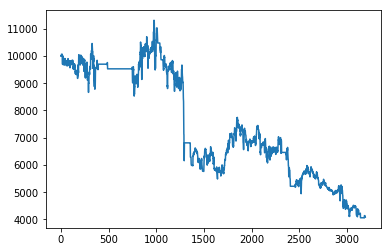

In [63]:
dfsso = pd.read_csv('SSO.csv')

df['srsi'] = talib.RSI(df['Adj Close'], 2)
df['lrsi'] = talib.RSI(df['Adj Close'], 14)

upper_band, _, lower_band = talib.BBANDS(  
    df['Adj Close'], timeperiod = 10,  
    nbdevup = 1, nbdevdn = 1,  
    matype = 0) 

start_date = len(df['Adj Close']) - len(dfsso['Adj Close'])

bought_price = None
current_price = None
commision = 0.0013
bench_mark = None
equity = []
capital = 10000
shares = 0



i = 0
for i in range(0, len(dfsso['Adj Close'])):
    current_price = dfsso['Adj Close'][i]
    
    if df['Adj Close'][start_date + i] > df['sma'][start_date + i]:
        if bought_price == None:
            if lower_band[start_date + i] <= df['Adj Close'][start_date + i]:
                bought_price = current_price
                shares = floor(capital / bought_price)
                capital -= (shares * bought_price) * commision
                capital -= shares * bought_price
        else:
            if df['Adj Close'][start_date + i] >= _[start_date + i]:
                bought_price = None
                capital -= (shares * current_price) * commision
                capital += (shares * current_price)
                shares = 0
    else:
        if bought_price != None:
            bought_price = None
            capital -= (shares * current_price) * commision
            capital += (shares * current_price)
            shares = 0
        
            
    equity.append(capital + (shares * current_price))

capital = capital + (shares * current_price)

print "return: " + str(round(PrecentChange(capital, 10000) * 100,2)) + "%"
print "algo max draw down: " + str(round(max_drawdown(equity) * 100,2)) + "%"
print "algo sharpe ratio:" + str(round(sharpe_ratio(equity),4))

plt.plot(equity)
plt.show()

trying to trade mean reversion doesnt seem to work even though the spy displays mean reverting properties when above the 200 day sma. instead of trying to trade to get an edge lets simply use the idea that the spy is less volatile above the 200 day sma.by buying a 3x leveraged etf we can reduce risk and be more profitable than the spy.

return: 382.13%
algo max draw down: -83.94%
algo sharpe ratio:0.0275


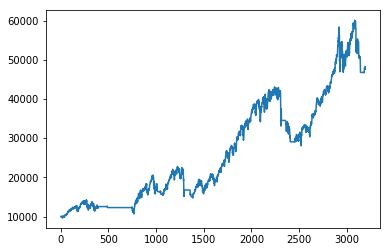

In [62]:
bought_price = None
current_price = None
commision = 0.0013
bench_mark = None
equity = []
capital = 10000
shares = 0

i = 0
for i in range(0, len(dfsso['Adj Close'])):
    current_price = dfsso['Adj Close'][i]
    
    if df['Adj Close'][start_date + i] > df['sma'][start_date + i]:
        if bought_price == None:
            bought_price = current_price
            shares = floor(capital / bought_price)
            capital -= (shares * bought_price) * commision
            capital -= shares * bought_price
    else:
        if bought_price != None:
            bought_price = None
            capital -= (shares * current_price) * commision
            capital += (shares * current_price)
            shares = 0
        
            
    equity.append(capital + (shares * current_price))

capital = capital + (shares * current_price)
print "return: " + str(round(PrecentChange(capital, 10000) * 100,2)) + "%"
print "algo max draw down: " + str(round(max_drawdown(equity) * 100,2)) + "%"
print "algo sharpe ratio:" + str(round(sharpe_ratio(equity),4))

plt.plot(equity)
plt.show()

as we can see the algo has a 68% return over the spy and yields 5% more than the spy on average per year making this model somthing that could be used over the standard spy if you are willing to risk a little bit more. to further the profits of this algo we can look at volatility and how to mitigate it. this will allow us to ditch the lagging sma and hopefull become more profitable. im goingto try to use average true range in order to place a stop loss to prevent losses.

return: 413.47%
algo max draw down: -83.72%
algo sharpe ratio: 0.0304
anual return: 31.81%


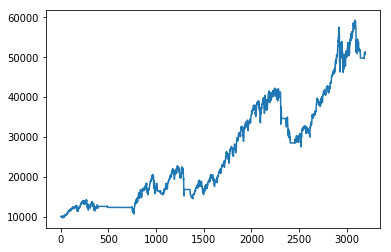

In [72]:
dfsso['atr'] = talib.ATR(dfsso['High'], dfsso['Low'], dfsso['Adj Close'], timeperiod=100)

bought_price = None
current_price = None
commision = 0.0013
bench_mark = None
equity = []
capital = 10000
shares = 0
stop_loss = 0
i = 0
for i in range(0, len(dfsso['Adj Close'])):
    current_price = dfsso['Adj Close'][i]
    
    if df['Adj Close'][start_date + i] > df['sma'][start_date + i]:
        if bought_price == None:
            bought_price = current_price
            shares = floor(capital / bought_price)
            capital -= (shares * bought_price) * commision
            capital -= shares * bought_price
            stop_loss = bought_price - (dfsso['atr'][i] * 1)
    elif df['Adj Close'][start_date + i] < df['sma'][start_date + i]:
        if bought_price != None:
            bought_price = None
            capital -= (shares * current_price) * commision
            capital += (shares * current_price)
            shares = 0

    if bought_price != None:
        if current_price <= stop_loss:
            bought_price = None
            capital -= (shares * current_price) * commision
            capital += (shares * current_price)
            shares = 0
        
            
    equity.append(capital + (shares * current_price))

capital = capital + (shares * current_price)
print "return: " + str(round(PrecentChange(capital, 10000) * 100,2)) + "%"
print "algo max draw down: " + str(round(max_drawdown(equity) * 100,2)) + "%"
print "algo sharpe ratio: " + str(round(sharpe_ratio(equity),4))
print "anual return: " + str(round(PrecentChange(capital, 10000) / 13 * 100,2)) + '%'

plt.plot(equity)
plt.show()

using the average true range we set a stop loss at the brought price minus 1 multiple of the current true range. this reduces our risk from false trends and cuts our losses shorter then the first rendition. we can also see that we have a sharpe ratio that is close to the spys sharpe ratio and our max draw down is only 3% more. with this slightly more risky algo we are able to net more than double the return of the spy since 2006 with an anual return of 31.81% compared to 14.36%.

I really want to remove the large down turns in the portfolio and i might be able to do this with machine learning. i could also look at other data sets such as consumer reports or even the vix. i think this model is built out and has highlighted my theory and reasoning around using the 200 day sma to gain an edge on the spy.